In [772]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [773]:
df = pd.read_csv('Advertising.csv')

In [774]:
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [775]:
df.rename(columns = {'Unnamed: 0':'Index'},inplace=True)

In [776]:
df.set_index('Index',inplace=True)

In [777]:
df

,TV,radio,newspaper,sales
Index,,,,
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8


In [778]:
#Statistical summary
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [779]:
df.shape

(200, 4)

In [780]:
#Column Data type
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

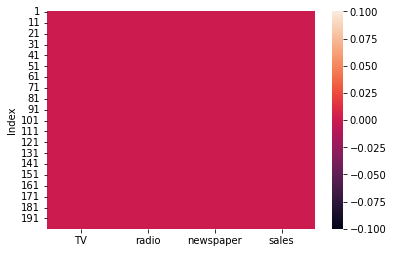

In [781]:
#Checking null values using heatmap
sns.heatmap(df.isnull())
plt.show()

In [782]:
#Total number of null values in complete dataset
df.isnull().sum().sum()

0

In [783]:
#number of null values in each column
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [784]:
#Making dataframe of Continous data
df_visualisation_continous = df[['TV','radio','newspaper','sales']].copy()

<AxesSubplot:xlabel='TV', ylabel='Density'>

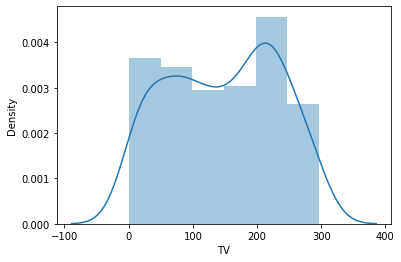

In [785]:
#Visualisation of TV data
sns.distplot(df_visualisation_continous['TV'])

<AxesSubplot:xlabel='radio', ylabel='Density'>

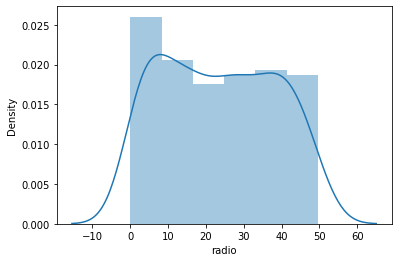

In [786]:
#Visualisation of Radio data
sns.distplot(df_visualisation_continous['radio'])

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

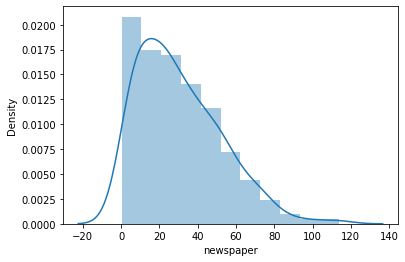

In [787]:
#Visualisation of Newspaper data
sns.distplot(df_visualisation_continous['newspaper'])

<AxesSubplot:xlabel='sales', ylabel='Density'>

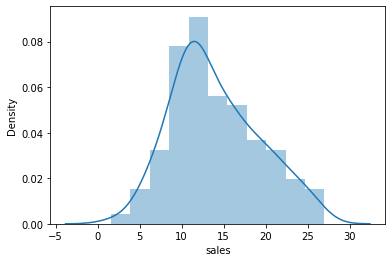

In [788]:
#Visualisation of sales data
sns.distplot(df_visualisation_continous['sales'])

Visualisation is completed

No use of Encoding of Dataframe(Converting String to numeric) because already all are numeric

<AxesSubplot:>

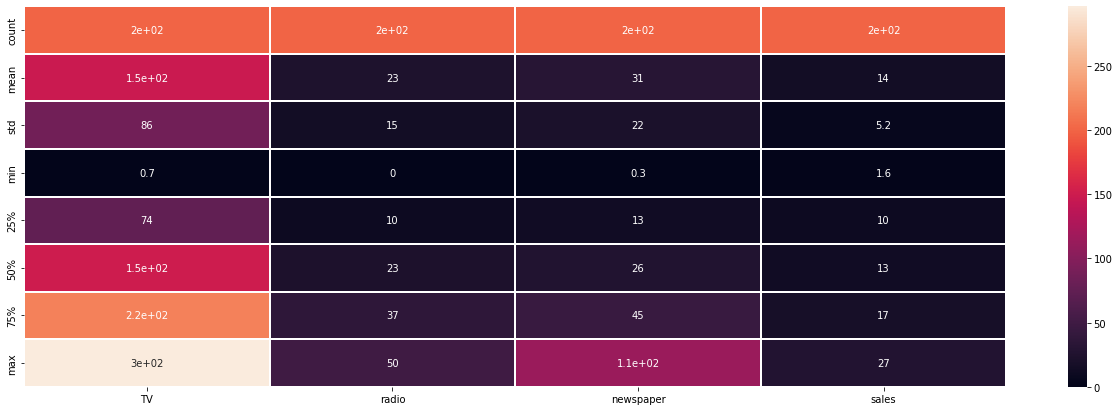

In [789]:
plt.figure(figsize = (22,7))
sns.heatmap(df.describe(),annot = True, linewidths=0.1)

In [790]:
#Correlation of Columns with target column
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

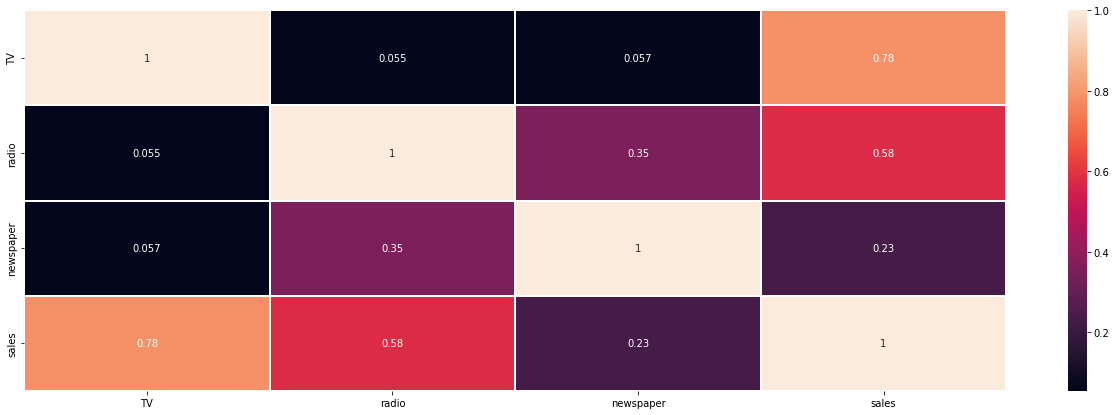

In [791]:
#Correlation of Columns with target column using heatmap
plt.figure(figsize = (22,7))
sns.heatmap(df.corr(),annot = True, linewidths=0.1)

In [792]:
#Checking columns which appear to be highly correlated with target columns

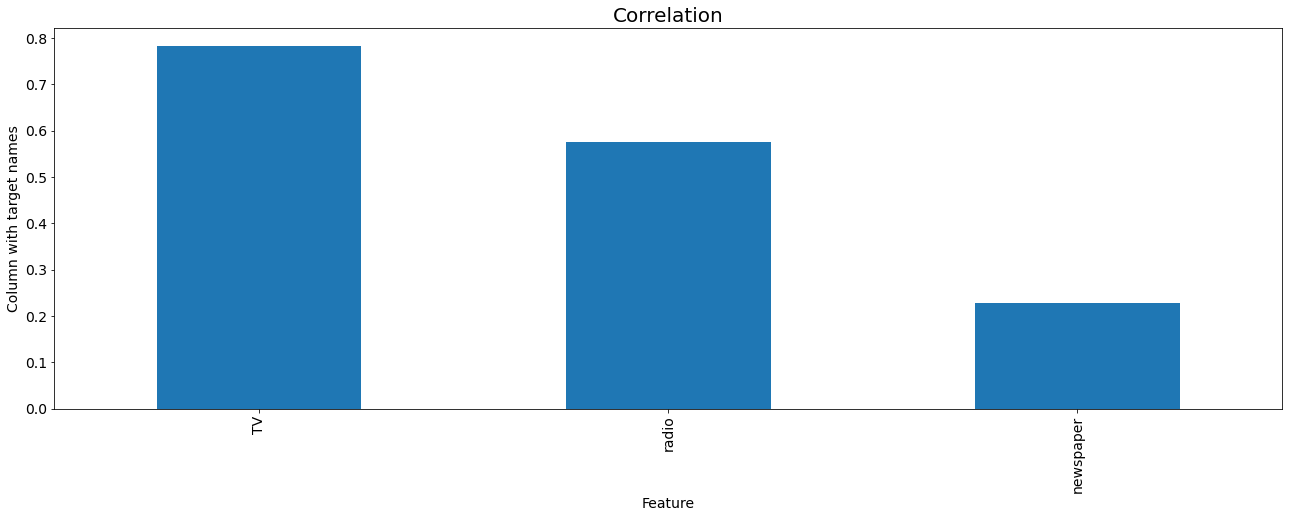

In [793]:
plt.figure(figsize=(22,7))
df.corr()['sales'].sort_values(ascending = False).drop(['sales']).plot(kind='bar',fontsize=14)
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Column with target names',fontsize=14)
plt.title('Correlation',fontsize=20)
plt.show()

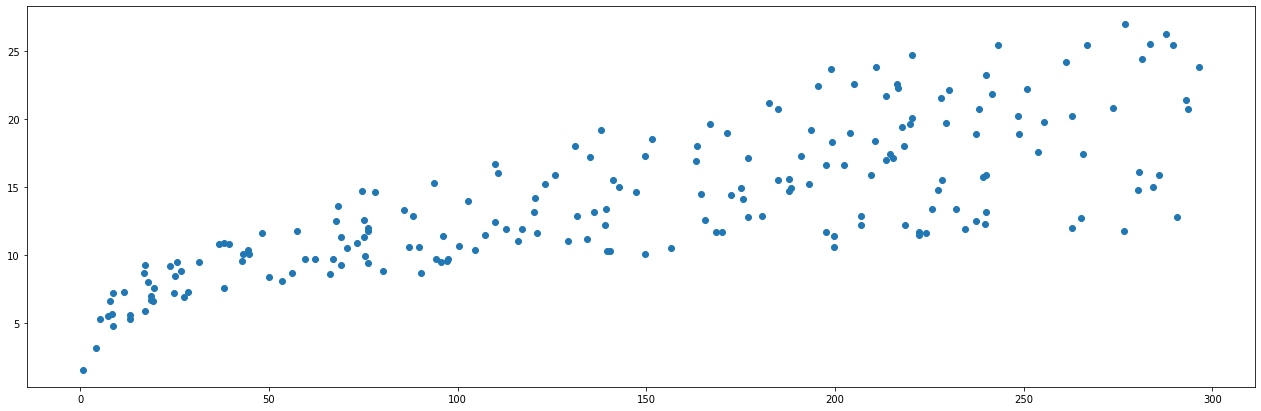

In [794]:
#Checking correlation between TV and sales
plt.figure(figsize=(22,7))
plt.scatter(df.TV,df.sales)
plt.show()

In [795]:
# calculate covariance matrix between TV and sales
covariance = np.cov(df.TV, df.sales)
print(covariance)

[[7370.94989322  350.39019472]
 [ 350.39019472   27.22185302]]


The covariance between the two variables is 350.39 . We can see that variables change in the same direction.

In [796]:
#Using pearson's correlation
from scipy.stats import pearsonr
corr, _ = pearsonr(df.TV, df.sales)
corr

0.7822244248616064

In [797]:
#We need to drop TV as it is highly correlated to target data and also has dual nodes in distribution plot
df = df.drop("TV", axis=1)

In [798]:
df

,radio,newspaper,sales
Index,,,
1,37.8,69.2,22.1
2,39.3,45.1,10.4
3,45.9,69.3,9.3
4,41.3,58.5,18.5
5,10.8,58.4,12.9
...,...,...,...
196,3.7,13.8,7.6
197,4.9,8.1,9.7
198,9.3,6.4,12.8


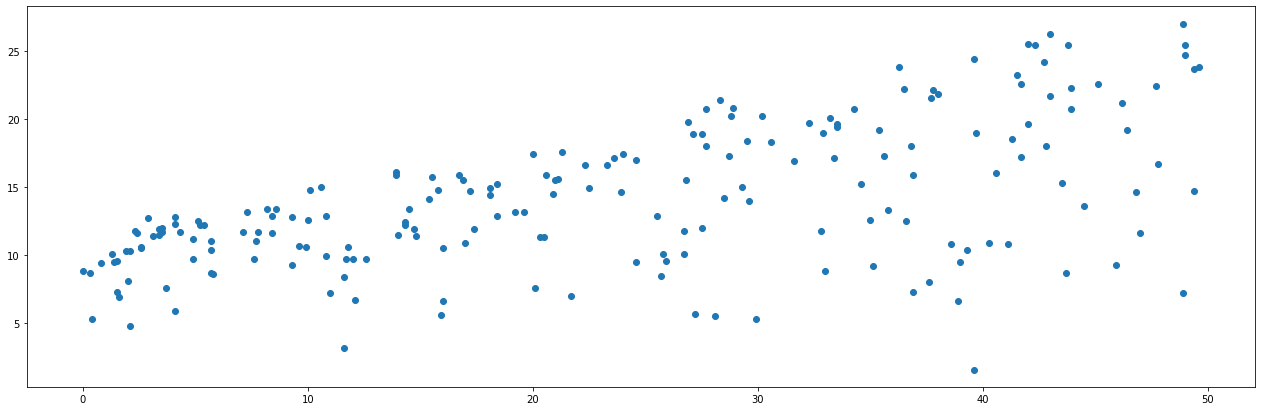

In [799]:
#Checking correlation between radio and sales
plt.figure(figsize=(22,7))
plt.scatter(df.radio,df.sales)
plt.show()

In [800]:
#Removing skewness
df.skew()

radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

Acceptable skewness (-0.65,+0.65)

In [801]:
#Applying box-cox
from scipy.stats import boxcox
df.newspaper = boxcox(df.newspaper)[0]

In [802]:
df.skew()

radio        0.094175
newspaper   -0.089651
sales        0.407571
dtype: float64

In [803]:
#Outlier check
df.dtypes

radio        float64
newspaper    float64
sales        float64
dtype: object

<AxesSubplot:>

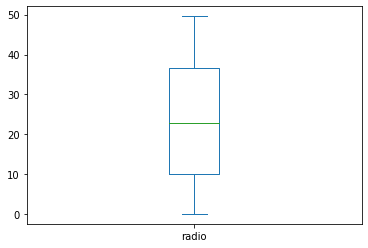

In [804]:
#Radio and newspaper are the only continous data types left
df['radio'].plot.box()

<AxesSubplot:>

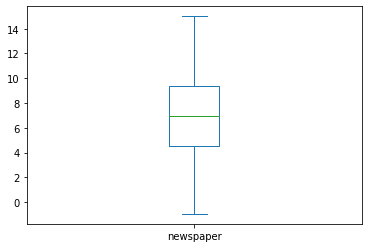

In [805]:
df['newspaper'].plot.box()

In [806]:
#Outlier removal using z-score
df.shape

(200, 3)

In [807]:
from scipy.stats import zscore

z = np.abs(zscore(df))
threshhold = 3
np.where(z>3)

(array([], dtype=int64), array([], dtype=int64))

In [808]:
df_new_z = df[(z<3).all(axis = 1)]
df_new_z

,radio,newspaper,sales
Index,,,
1,37.8,11.719889,22.1
2,39.3,9.400769,10.4
3,45.9,11.728438,9.3
4,41.3,10.760018,18.5
5,10.8,10.750586,12.9
...,...,...,...
196,3.7,4.786082,7.6
197,4.9,3.349723,9.7
198,9.3,2.810135,12.8


In [809]:
df_new_z.shape

(200, 3)

In [810]:
#Data Loss
Data_loss = (200-200)/200*100
Data_loss

0.0

Hence no outliers

Separating the columns into features and target:

In [811]:
feature = df.drop("sales",axis=1)
target = df["sales"]

In [812]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()


from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split


In [813]:
import warnings
warnings.filterwarnings('ignore')

In [814]:
for i in range(0,100):
    features_train,features_test,target_train,target_test = train_test_split(feature,target,test_size = 0.2,random_state = i)
    lr.fit(features_train,target_train)
    pred_train = lr.predict(features_train)
    pred_test = lr.predict(features_test)
    print("At random state " + str(i) + " the training accuracy is : " + str(r2_score(target_train,pred_train)))
    print("At random state " + str(i) + " the testing accuracy is : " + str(r2_score(target_test,pred_test)))
    print("\n")

At random state 0 the training accuracy is : 0.3603392471629624
At random state 0 the testing accuracy is : 0.21519720750658333


At random state 1 the training accuracy is : 0.32191049847411957
At random state 1 the testing accuracy is : 0.35407940125359316


At random state 2 the training accuracy is : 0.3704161781825166
At random state 2 the testing accuracy is : 0.04214654814107843


At random state 3 the training accuracy is : 0.314634124467864
At random state 3 the testing accuracy is : 0.41157245261485154


At random state 4 the training accuracy is : 0.30457044371583564
At random state 4 the testing accuracy is : 0.36850336888231294


At random state 5 the training accuracy is : 0.30909236630802983
At random state 5 the testing accuracy is : 0.41483329756858134


At random state 6 the training accuracy is : 0.3393533797545121
At random state 6 the testing accuracy is : 0.28999378792063435


At random state 7 the training accuracy is : 0.32832336381550364
At random state 7 the t

At random state 79 the training accuracy is : 0.2911909733507415
At random state 79 the testing accuracy is : 0.38771522064532205


At random state 80 the training accuracy is : 0.40154234276354683
At random state 80 the testing accuracy is : 0.0072744336960298694


At random state 81 the training accuracy is : 0.34471148145001396
At random state 81 the testing accuracy is : 0.23535104528658923


At random state 82 the training accuracy is : 0.32271469588870794
At random state 82 the testing accuracy is : 0.37162924657475294


At random state 83 the training accuracy is : 0.3147725532113693
At random state 83 the testing accuracy is : 0.3725821215920865


At random state 84 the training accuracy is : 0.33083593402859846
At random state 84 the testing accuracy is : 0.3345029095735963


At random state 85 the training accuracy is : 0.35461731581309597
At random state 85 the testing accuracy is : 0.2319658905785491


At random state 86 the training accuracy is : 0.33549579867217205
At ran

In [815]:
features_train,features_test,target_train,target_test = train_test_split(feature,target,test_size = 0.2,random_state = 6)

In [816]:
lr.fit(features_train,target_train)

LinearRegression()

In [817]:
pred_test = lr.predict(features_test)

In [818]:
print(r2_score(target_test,pred_test))

0.28999378792063435


Cross Validation of model

In [819]:
Train_accuracy = r2_score(target_train,pred_train)
Test_accuracy = r2_score(target_test,pred_test)

In [820]:
from sklearn.model_selection import cross_val_score

for j in range(2,10):
    cv_score = cross_val_score(lr,feature,target,cv=j)
    cv_mean = cv_score.mean()
    print("At cross fold " + str(j) + " the cv score is " + str(cv_mean) + " and accuracy score for training is " + str(Train_accuracy) + " and accuracy score for testing is " + str(Test_accuracy))
    print("\n")

At cross fold 2 the cv score is 0.2817619868152846 and accuracy score for training is -0.3501312838104389 and accuracy score for testing is 0.28999378792063435


At cross fold 3 the cv score is 0.3012351512964201 and accuracy score for training is -0.3501312838104389 and accuracy score for testing is 0.28999378792063435


At cross fold 4 the cv score is 0.2910790887892109 and accuracy score for training is -0.3501312838104389 and accuracy score for testing is 0.28999378792063435


At cross fold 5 the cv score is 0.28940793749620564 and accuracy score for training is -0.3501312838104389 and accuracy score for testing is 0.28999378792063435


At cross fold 6 the cv score is 0.265611946957301 and accuracy score for training is -0.3501312838104389 and accuracy score for testing is 0.28999378792063435


At cross fold 7 the cv score is 0.2546224095839363 and accuracy score for training is -0.3501312838104389 and accuracy score for testing is 0.28999378792063435


At cross fold 8 the cv score

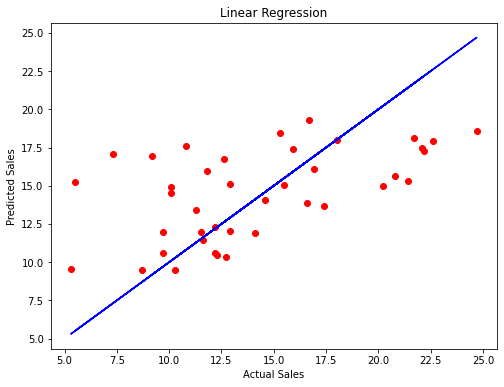

In [821]:
plt.figure(figsize=(8,6))
plt.scatter(x=target_test,y=pred_test, color='r')
plt.plot(target_test,target_test,color='b')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Linear Regression')
plt.show()

linear Regression gives not too good result. For better result we need hundreds of thousands of data points

Regularization:

In [822]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [823]:
from sklearn.linear_model import Lasso
parameters = {'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [824]:
ls = Lasso(alpha = 1, random_state=0)
ls.fit(features_train,target_train)
ls.score(features_train,target_train)
pred_ls = ls.predict(features_test)

lss = r2_score(target_test,pred_ls)
lss

0.3141986576346659

In [825]:
cv_score = cross_val_score(ls,feature,target,cv=2)
cv_mean =cv_score.mean()
cv_mean

0.31117339160287605

Ensemble technique:

In [826]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters = {'criterion':['mse','mae'], 'max_features': ["auto","sqrt","log2"]}
rf = RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'log2'}


In [827]:
rf = RandomForestRegressor(criterion = "mae", max_features = "log2")
rf.fit(features_train,target_train)
rf.score(features_train,target_train)
pred_decision = rf.predict(features_test)

rfs = r2_score(target_test,pred_decision)
print('R2 score: ', rfs*100)

rfscore = cross_val_score(ls,feature,target,cv=2)
rfc =rfscore.mean()
rfc
print('Cross Validation score: ', rfc*100)

R2 score:  36.67387482119789
Cross Validation score:  31.117339160287607


Conclusion : Reason why we are getting so low scores are due to lack of sufficient data